# 차기 신도시 아파트 공급을 위한 경기도 외각지역 위치 추천 &연도별 아파트 면적 선호도 추이
## 데이터 분석 및 시각화 과정 세미 프로젝트(M조) : 

## [배경] 서울 전출하여 경기 전입 인구 추이(2010년-2022년)

#### 처리 목적
* 서울시에서 전출하여 경기도로 전입하는 순이동 수(명)를 통해 이동 추이 확인

#### 처리 사항
1. 서울시에서 전출하여 경기도로 전입하는 순이동 수(명) 데이터 수집
2. 서울시에서 경기도로 이동하는 인구 추이 확인
3. 결과를 시각화

#### 활용 데이터
* KOSIS 국가통계포털의 데이터:
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B26003_A01&vw_cd=MT_ZTITLE&list_id=A_1&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do

In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 1. 데이터 불러오기

In [4]:
# 데이터 불러오기
in_out_data = pd.read_csv('Pdata/전출지_전입지_시도_별_이동자수_(2010_2022).csv',encoding='CP949')

### 불러온 데이터 확인하기

In [5]:
### 불러온 데이터 확인하기# 데이터 정보확인
in_out_data.head()

,전출지별,전입지별,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,전출지별,전입지별,이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),...,이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명),이동자수 (명),순이동자수 (명)
1,전국,전국,8226594,0,8127195,0,7506691,0,7411784,0,...,7297099,0,7104398,0,7735491,0,7213422,0,6152155,0
2,전국,서울특별시,1733015,-115023,1721748,-113058,1555281,-103647,1520090,-100550,...,1439707,-110230,1426493,-49588,1578127,-64850,1418187,-106243,1201527,-35340
3,전국,부산광역시,519334,-28466,508043,-24863,461042,-20610,478451,-17710,...,416095,-26759,411704,-23354,491829,-14347,441323,-18903,383848,-13562
4,전국,대구광역시,370817,-11840,370563,-12747,348642,-10564,351873,-11351,...,321158,-14242,312419,-23673,347248,-16835,304761,-24319,265354,-11519


In [6]:
## 2. 데이터 살펴보기# 데이터 정보확인
in_out_data.전출지별.unique()

array(['전출지별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [7]:
# 데이터 정보확인
in_out_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    325 non-null    object
 1   전입지별    325 non-null    object
 2   2010    325 non-null    object
 3   2010.1  325 non-null    object
 4   2011    325 non-null    object
 5   2011.1  325 non-null    object
 6   2012    325 non-null    object
 7   2012.1  325 non-null    object
 8   2013    325 non-null    object
 9   2013.1  325 non-null    object
 10  2014    325 non-null    object
 11  2014.1  325 non-null    object
 12  2015    325 non-null    object
 13  2015.1  325 non-null    object
 14  2016    325 non-null    object
 15  2016.1  325 non-null    object
 16  2017    325 non-null    object
 17  2017.1  325 non-null    object
 18  2018    325 non-null    object
 19  2018.1  325 non-null    object
 20  2019    325 non-null    object
 21  2019.1  325 non-null    object
 22  2020    325 non-null    ob

## 2. 데이터 살펴보기

### 데이터 불필요한 컬럼 제거

In [8]:
# 데이터 불필요한 컬럼 제거
# 순이동자수(명) 컬럼만 도출
real_in_out_data = in_out_data.drop([in_out_data.columns[2],in_out_data.columns[4],in_out_data.columns[6],
                                   in_out_data.columns[8],in_out_data.columns[10],in_out_data.columns[12],
                                   in_out_data.columns[14],in_out_data.columns[16],in_out_data.columns[18],
                                   in_out_data.columns[20],in_out_data.columns[22],in_out_data.columns[24],
                                   in_out_data.columns[26]],axis = 1)
real_in_out_data.head()

,전출지별,전입지별,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
0,전출지별,전입지별,순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명)
1,전국,전국,0,0,0,0,0,0,0,0,0,0,0,0,0
2,전국,서울특별시,-115023,-113058,-103647,-100550,-87831,-137256,-140257,-98486,-110230,-49588,-64850,-106243,-35340
3,전국,부산광역시,-28466,-24863,-20610,-17710,-15092,-13560,-21392,-28398,-26759,-23354,-14347,-18903,-13562
4,전국,대구광역시,-11840,-12747,-10564,-11351,-15526,-12940,-9260,-11936,-14242,-23673,-16835,-24319,-11519


#### 컬럼명 변경

In [9]:
#컬럼명 변경
real_in_out_data.rename(columns = {'2010.1' : '2010년 순이동자수(명)',
                                   '2011.1' : '2011년 순이동자수(명)',
                                   '2012.1' : '2012년 순이동자수(명)',
                                   '2013.1' : '2013년 순이동자수(명)',
                                   '2014.1' : '2014년 순이동자수(명)',
                                   '2015.1' : '2015년 순이동자수(명)',
                                   '2016.1' : '2016년 순이동자수(명)',
                                   '2017.1' : '2017년 순이동자수(명)',
                                   '2018.1' : '2018년 순이동자수(명)',
                                   '2019.1' : '2019년 순이동자수(명)',
                                   '2020.1' : '2020년 순이동자수(명)',
                                   '2021.1' : '2021년 순이동자수(명)',
                                   '2022.1' : '2022년 순이동자수(명)'}
                       ,inplace = True)
real_in_out_data.head()

,전출지별,전입지별,2010년 순이동자수(명),2011년 순이동자수(명),2012년 순이동자수(명),2013년 순이동자수(명),2014년 순이동자수(명),2015년 순이동자수(명),2016년 순이동자수(명),2017년 순이동자수(명),2018년 순이동자수(명),2019년 순이동자수(명),2020년 순이동자수(명),2021년 순이동자수(명),2022년 순이동자수(명)
0,전출지별,전입지별,순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명)
1,전국,전국,0,0,0,0,0,0,0,0,0,0,0,0,0
2,전국,서울특별시,-115023,-113058,-103647,-100550,-87831,-137256,-140257,-98486,-110230,-49588,-64850,-106243,-35340
3,전국,부산광역시,-28466,-24863,-20610,-17710,-15092,-13560,-21392,-28398,-26759,-23354,-14347,-18903,-13562
4,전국,대구광역시,-11840,-12747,-10564,-11351,-15526,-12940,-9260,-11936,-14242,-23673,-16835,-24319,-11519


In [10]:
# 데이터 정보확인
real_in_out_data.head()

,전출지별,전입지별,2010년 순이동자수(명),2011년 순이동자수(명),2012년 순이동자수(명),2013년 순이동자수(명),2014년 순이동자수(명),2015년 순이동자수(명),2016년 순이동자수(명),2017년 순이동자수(명),2018년 순이동자수(명),2019년 순이동자수(명),2020년 순이동자수(명),2021년 순이동자수(명),2022년 순이동자수(명)
0,전출지별,전입지별,순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명),순이동자수 (명)
1,전국,전국,0,0,0,0,0,0,0,0,0,0,0,0,0
2,전국,서울특별시,-115023,-113058,-103647,-100550,-87831,-137256,-140257,-98486,-110230,-49588,-64850,-106243,-35340
3,전국,부산광역시,-28466,-24863,-20610,-17710,-15092,-13560,-21392,-28398,-26759,-23354,-14347,-18903,-13562
4,전국,대구광역시,-11840,-12747,-10564,-11351,-15526,-12940,-9260,-11936,-14242,-23673,-16835,-24319,-11519


## 3. 전출지 서울, 전입지 경기 데이터 추출

### 1) "전출지 : 서울"  데이터프레임 생성

In [11]:
#서울--> 서울제외지역 전입지
mask = (real_in_out_data['전출지별'] == '서울특별시') & (real_in_out_data['전입지별'] != '서울특별시')
df_out_seoul = real_in_out_data[mask]
df_out_seoul.head()

,전출지별,전입지별,2010년 순이동자수(명),2011년 순이동자수(명),2012년 순이동자수(명),2013년 순이동자수(명),2014년 순이동자수(명),2015년 순이동자수(명),2016년 순이동자수(명),2017년 순이동자수(명),2018년 순이동자수(명),2019년 순이동자수(명),2020년 순이동자수(명),2021년 순이동자수(명),2022년 순이동자수(명)
19,서울특별시,전국,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340
21,서울특별시,부산광역시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885
22,서울특별시,대구광역시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304
23,서울특별시,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500
24,서울특별시,광주광역시,-1547,-1330,-1657,-1835,-1759,-1644,-2078,-2629,-3481,-3713,-4054,-3185,-3614


In [12]:
# 컬럼명 변경

plo_df_out_seoul = df_out_seoul.rename(columns = { '2010년 순이동자수(명)' : '2010년',
                                                     '2011년 순이동자수(명)' : '2011년',
                                                     '2012년 순이동자수(명)' : '2012년',
                                                     '2013년 순이동자수(명)' : '2013년',
                                                     '2014년 순이동자수(명)' : '2014년',
                                                     '2015년 순이동자수(명)' : '2015년',
                                                     '2016년 순이동자수(명)' : '2016년',
                                                     '2017년 순이동자수(명)' : '2017년',
                                                     '2018년 순이동자수(명)' : '2018년',
                                                     '2019년 순이동자수(명)' : '2019년',
                                                     '2020년 순이동자수(명)' : '2020년',
                                                     '2021년 순이동자수(명)' : '2021년',
                                                     '2022년 순이동자수(명)' : '2022년'})
plo_df_out_seoul

,전출지별,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
19,서울특별시,전국,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340
21,서울특별시,부산광역시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885
22,서울특별시,대구광역시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304
23,서울특별시,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500
24,서울특별시,광주광역시,-1547,-1330,-1657,-1835,-1759,-1644,-2078,-2629,-3481,-3713,-4054,-3185,-3614
25,서울특별시,대전광역시,-1974,-990,-490,-716,-769,-106,-1107,-2303,-2630,-3966,-4083,-2710,-2715
26,서울특별시,울산광역시,-1742,-1090,-1108,-805,-411,-1004,-1648,-2448,-2763,-3128,-2977,-2621,-2655
27,서울특별시,세종특별자치시,-,-,1983,1756,4984,5322,3131,2618,2137,1431,439,918,342
28,서울특별시,경기도,124772,101364,99960,94337,83084,119780,136403,107985,135216,91954,109492,124910,60234
29,서울특별시,강원도,-62,2065,1008,647,999,2629,1713,1255,-859,-790,653,1715,1010


In [13]:
# 컬럼 및 인덱스 항목 수정
plo_df_out_seoul.set_index('전입지별', drop=True)
plo_df_out_seoul1 = plo_df_out_seoul.drop([plo_df_out_seoul.columns[0]],axis=1)
plo_df_out_seoul1

,전출지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
전입지별,,,,,,,,,,,,,,
전국,서울특별시,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340
부산광역시,서울특별시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885
대구광역시,서울특별시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304
인천광역시,서울특별시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500
광주광역시,서울특별시,-1547,-1330,-1657,-1835,-1759,-1644,-2078,-2629,-3481,-3713,-4054,-3185,-3614
대전광역시,서울특별시,-1974,-990,-490,-716,-769,-106,-1107,-2303,-2630,-3966,-4083,-2710,-2715
울산광역시,서울특별시,-1742,-1090,-1108,-805,-411,-1004,-1648,-2448,-2763,-3128,-2977,-2621,-2655
세종특별자치시,서울특별시,-,-,1983,1756,4984,5322,3131,2618,2137,1431,439,918,342
경기도,서울특별시,124772,101364,99960,94337,83084,119780,136403,107985,135216,91954,109492,124910,60234


,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
19,전국,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340
21,부산광역시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885
22,대구광역시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304
23,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500
24,광주광역시,-1547,-1330,-1657,-1835,-1759,-1644,-2078,-2629,-3481,-3713,-4054,-3185,-3614
25,대전광역시,-1974,-990,-490,-716,-769,-106,-1107,-2303,-2630,-3966,-4083,-2710,-2715
26,울산광역시,-1742,-1090,-1108,-805,-411,-1004,-1648,-2448,-2763,-3128,-2977,-2621,-2655
27,세종특별자치시,-,-,1983,1756,4984,5322,3131,2618,2137,1431,439,918,342
28,경기도,124772,101364,99960,94337,83084,119780,136403,107985,135216,91954,109492,124910,60234
29,강원도,-62,2065,1008,647,999,2629,1713,1255,-859,-790,653,1715,1010


* 전국을 6개의 구역으로 분리 지정
* 구역 ['전국','강원권','경상권','수도권','전라권','충청권','제주'] 

In [14]:
# 구역 ['전국','강원권','경상권','수도권','전라권','충청권','제주'] 부여
plo_df_out_seoul1['구역'] = ['전국','경상권','경상권','수도권','전라권','충청권','경상권','충청권',
                          '수도권','강원권','충청권','충청권','전라권','전라권','경상권','경상권','제주']
plo_df_out_seoul1

,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,구역
19,전국,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340,전국
21,부산광역시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885,경상권
22,대구광역시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304,경상권
23,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500,수도권
24,광주광역시,-1547,-1330,-1657,-1835,-1759,-1644,-2078,-2629,-3481,-3713,-4054,-3185,-3614,전라권
25,대전광역시,-1974,-990,-490,-716,-769,-106,-1107,-2303,-2630,-3966,-4083,-2710,-2715,충청권
26,울산광역시,-1742,-1090,-1108,-805,-411,-1004,-1648,-2448,-2763,-3128,-2977,-2621,-2655,경상권
27,세종특별자치시,-,-,1983,1756,4984,5322,3131,2618,2137,1431,439,918,342,충청권
28,경기도,124772,101364,99960,94337,83084,119780,136403,107985,135216,91954,109492,124910,60234,수도권
29,강원도,-62,2065,1008,647,999,2629,1713,1255,-859,-790,653,1715,1010,강원권


In [15]:
# 구역 기준 정렬
plo_df_out_seoul1.sort_values(by = '구역', ascending=True)

,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,구역
29,강원도,-62,2065,1008,647,999,2629,1713,1255,-859,-790,653,1715,1010,강원권
21,부산광역시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885,경상권
22,대구광역시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304,경상권
34,경상북도,-2353,-1501,-2503,-2141,-2340,-1365,-1851,-3217,-4442,-4952,-5949,-3530,-3831,경상권
26,울산광역시,-1742,-1090,-1108,-805,-411,-1004,-1648,-2448,-2763,-3128,-2977,-2621,-2655,경상권
35,경상남도,-2991,-2290,-3756,-2394,-2345,-1561,-3452,-4620,-6169,-6957,-6965,-5716,-6350,경상권
28,경기도,124772,101364,99960,94337,83084,119780,136403,107985,135216,91954,109492,124910,60234,수도권
23,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500,수도권
19,전국,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340,전국
32,전라북도,-1208,155,-1060,-586,-1336,5,-1158,-1751,-3675,-4209,-3515,-1830,-2439,전라권


In [16]:
# 데이터 정보확인
plo_df_out_seoul1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 19 to 36
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전입지별    17 non-null     object
 1   2010년   17 non-null     object
 2   2011년   17 non-null     object
 3   2012년   17 non-null     object
 4   2013년   17 non-null     object
 5   2014년   17 non-null     object
 6   2015년   17 non-null     object
 7   2016년   17 non-null     object
 8   2017년   17 non-null     object
 9   2018년   17 non-null     object
 10  2019년   17 non-null     object
 11  2020년   17 non-null     object
 12  2021년   17 non-null     object
 13  2022년   17 non-null     object
 14  구역      17 non-null     object
dtypes: object(15)
memory usage: 2.1+ KB


#### 결측치 처리

* 세종특별자치시의 경우, 2012년 출범했기 때문에 이전 데이터 값이 존재하지 않아 결측치임. 이를 0으로 변환

In [17]:
# 결측치('-') 값 수정 
# 세종특별자치시의 경우, 2012년 출범했기 때문에 이전 데이터 값이 존재하지 않아 결측치임. 이를 0으로 변환
plo_df_out_seoul1 = plo_df_out_seoul1.replace('-','0')

* dtype 변환 :  object-->int64 

In [18]:
# dtype 변환 :  object-->int64 
plo_df_out_seoul1= plo_df_out_seoul1.astype({'2010년':'int64',
                         '2011년':'int64',
                         '2012년':'int64',
                         '2013년':'int64',
                         '2014년':'int64',
                         '2015년':'int64',
                         '2016년':'int64',
                         '2017년':'int64',
                         '2018년':'int64',
                         '2019년':'int64',
                         '2020년':'int64',
                         '2021년':'int64',
                          '2022년':'int64'})

In [19]:
# 데이터 정보확인
plo_df_out_seoul1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 19 to 36
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전입지별    17 non-null     object
 1   2010년   17 non-null     int64 
 2   2011년   17 non-null     int64 
 3   2012년   17 non-null     int64 
 4   2013년   17 non-null     int64 
 5   2014년   17 non-null     int64 
 6   2015년   17 non-null     int64 
 7   2016년   17 non-null     int64 
 8   2017년   17 non-null     int64 
 9   2018년   17 non-null     int64 
 10  2019년   17 non-null     int64 
 11  2020년   17 non-null     int64 
 12  2021년   17 non-null     int64 
 13  2022년   17 non-null     int64 
 14  구역      17 non-null     object
dtypes: int64(13), object(2)
memory usage: 2.1+ KB


#### 년도별 합계 컬럼 추가

In [20]:
# 행별 합계 컬럼 추가
plo_df_out_seoul1['합계'] = plo_df_out_seoul1['2010년']+plo_df_out_seoul1['2011년']+plo_df_out_seoul1['2012년']
+plo_df_out_seoul1['2013년']+plo_df_out_seoul1['2014년']+plo_df_out_seoul1['2015년']+plo_df_out_seoul1['2016년']+plo_df_out_seoul1['2017년']
+plo_df_out_seoul1['2018년']+plo_df_out_seoul1['2019년']+plo_df_out_seoul1['2020년']+plo_df_out_seoul1['2021년']+plo_df_out_seoul1['2022년']

19    564380
21    -18346
22    -16861
23     53800
24     -9945
25     -5001
26     -6316
27     17811
28    541589
29      7243
30      4105
31     12046
32     -4826
33     -2452
34    -10914
35    -14372
36     16819
dtype: int64

19    366251
21    -36721
22    -30435
23     36108
24    -18047
25    -16104
26    -14144
27      5267
28    521806
29      1729
30     -4357
31     -2141
32    -15668
33    -10053
34    -22704
35    -32157
36      3872
dtype: int64

In [21]:
# 데이터 정보확인
plo_df_out_seoul1.head()

,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,구역,합계
19,전국,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340,전국,331728
21,부산광역시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885,경상권,-15200
22,대구광역시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304,경상권,-10254
23,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500,수도권,46469
24,광주광역시,-1547,-1330,-1657,-1835,-1759,-1644,-2078,-2629,-3481,-3713,-4054,-3185,-3614,전라권,-4534


### 2) 전입지 구역별로 그룹화하여 데이터프레임 생성

#### 구역값을 기준으로 그룹화

In [22]:
# group화 : 구역을 기준으로 그룹화
group_df_out_seoul = plo_df_out_seoul1.groupby(['구역'])
group_df_out_seoul
group_soodo = group_df_out_seoul.get_group('수도권')
group_soodo

,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,구역,합계
23,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500,수도권,46469
28,경기도,124772,101364,99960,94337,83084,119780,136403,107985,135216,91954,109492,124910,60234,수도권,326096


In [23]:
# 그룹별 value갑 확인
for key, group in group_df_out_seoul:
    print('* 구역 : ',key)
    print('* number : ',len(group))
    print(group.합계.head())
    print('\n')

* 구역 :  강원권
* number :  1
29    3011
Name: 합계, dtype: int64


* 구역 :  경상권
* number :  5
21   -15200
22   -10254
26    -3940
34    -6357
35    -9037
Name: 합계, dtype: int64


* 구역 :  수도권
* number :  2
23     46469
28    326096
Name: 합계, dtype: int64


* 구역 :  전국
* number :  1
19    331728
Name: 합계, dtype: int64


* 구역 :  전라권
* number :  3
24   -4534
32   -2113
33   -2714
Name: 합계, dtype: int64


* 구역 :  제주
* number :  1
36    2289
Name: 합계, dtype: int64


* 구역 :  충청권
* number :  4
25   -3454
27    1983
30    3396
31    6087
Name: 합계, dtype: int64




In [24]:
# 인덱스 reset
plo_df_out_seoul1 = plo_df_out_seoul1.reset_index(drop=True)
plo_df_out_seoul1.head()

,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,구역,합계
0,전국,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340,전국,331728
1,부산광역시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885,경상권,-15200
2,대구광역시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304,경상권,-10254
3,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500,수도권,46469
4,광주광역시,-1547,-1330,-1657,-1835,-1759,-1644,-2078,-2629,-3481,-3713,-4054,-3185,-3614,전라권,-4534


In [25]:
# 컬럼 순서 변경
plo_df_out_seoul1 = plo_df_out_seoul1[['구역','전입지별',
                                       '2010년','2011년','2012년','2013년','2014년','2015년',
                                      '2016년','2017년','2018년','2019년','2020년','2021년','2022년']]
plo_df_out_seoul1.sort_values(by='구역')

,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
9,강원권,강원도,-62,2065,1008,647,999,2629,1713,1255,-859,-790,653,1715,1010
1,경상권,부산광역시,-5698,-4200,-5302,-3468,-3296,-2432,-4174,-4976,-6644,-7480,-7781,-6931,-7885
2,경상권,대구광역시,-3638,-2913,-3703,-3042,-3673,-2847,-3179,-4120,-5303,-6618,-6424,-5786,-6304
14,경상권,경상북도,-2353,-1501,-2503,-2141,-2340,-1365,-1851,-3217,-4442,-4952,-5949,-3530,-3831
6,경상권,울산광역시,-1742,-1090,-1108,-805,-411,-1004,-1648,-2448,-2763,-3128,-2977,-2621,-2655
15,경상권,경상남도,-2991,-2290,-3756,-2394,-2345,-1561,-3452,-4620,-6169,-6957,-6965,-5716,-6350
8,수도권,경기도,124772,101364,99960,94337,83084,119780,136403,107985,135216,91954,109492,124910,60234
3,수도권,인천광역시,10412,18633,17424,14407,8832,11345,11259,7957,8818,3811,1466,10513,11500
0,전국,전국,115023,113058,103647,100550,87831,137256,140257,98486,110230,49588,64850,106243,35340
12,전라권,전라북도,-1208,155,-1060,-586,-1336,5,-1158,-1751,-3675,-4209,-3515,-1830,-2439


In [26]:
# 서울-->구역별로 추출하여 데이터 프레임 생성
mask1 = (plo_df_out_seoul1['구역'] == '강원권') 
mask2 = (plo_df_out_seoul1['구역'] == '경상권') 
mask3 = (plo_df_out_seoul1['구역'] == '수도권') 
mask4 = (plo_df_out_seoul1['구역'] == '전라권') 
mask5 = (plo_df_out_seoul1['구역'] == '제주') 
mask6 = (plo_df_out_seoul1['구역'] == '충청권')
mask7 = (plo_df_out_seoul1['구역'] == '전국') 


df_gangwon = plo_df_out_seoul1[mask1]
df_gyeongsang = plo_df_out_seoul1[mask2]
df_soodo = plo_df_out_seoul1[mask3]
df_jeonla = plo_df_out_seoul1[mask4]
df_jeju = plo_df_out_seoul1[mask5]
df_choongcheng = plo_df_out_seoul1[mask6]
df_kr = plo_df_out_seoul1[mask7]

# df_gangwon
# df_gyeongsang
# df_soodo
# df_jeonla
# df_jeju
# df_choongcheng
# df_kr

* 구역별 각각의 데이터프레임에 컬럼별 합계 행 추가

In [27]:
# 컬럼별 합계 행 추가
df_gangwon.loc['합계',:] = df_gangwon.loc[:,'2010년':'2022년'].sum(axis=0)
df_gangwon
df_gyeongsang.loc['합계',:] = df_gyeongsang.loc[:,'2010년':'2022년'].sum(axis=0)
df_gyeongsang
df_soodo.loc['합계',:] = df_soodo.loc[:,'2010년':'2022년'].sum(axis=0)
df_soodo
df_jeonla.loc['합계',:] = df_jeonla.loc[:,'2010년':'2022년'].sum(axis=0)
df_jeonla
df_jeju.loc['합계',:] = df_jeju.loc[:,'2010년':'2022년'].sum(axis=0)
df_jeju
df_choongcheng.loc['합계',:] = df_choongcheng.loc[:,'2010년':'2022년'].sum(axis=0)
df_choongcheng
df_kr.loc['합계',:] = df_kr.loc[:,'2010년':'2022년'].sum(axis=0)
df_kr

# df_gangwon
# df_gyeongsang
# df_soodo
# df_jeonla
# df_jeju
# df_choongcheng
# df_kr

,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
9,강원권,강원도,-62.0,2065.0,1008.0,647.0,999.0,2629.0,1713.0,1255.0,-859.0,-790.0,653.0,1715.0,1010.0
합계,NaN,NaN,-62.0,2065.0,1008.0,647.0,999.0,2629.0,1713.0,1255.0,-859.0,-790.0,653.0,1715.0,1010.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,경상권,부산광역시,-5698.0,-4200.0,-5302.0,-3468.0,-3296.0,-2432.0,-4174.0,-4976.0,-6644.0,-7480.0,-7781.0,-6931.0,-7885.0
2,경상권,대구광역시,-3638.0,-2913.0,-3703.0,-3042.0,-3673.0,-2847.0,-3179.0,-4120.0,-5303.0,-6618.0,-6424.0,-5786.0,-6304.0
6,경상권,울산광역시,-1742.0,-1090.0,-1108.0,-805.0,-411.0,-1004.0,-1648.0,-2448.0,-2763.0,-3128.0,-2977.0,-2621.0,-2655.0
14,경상권,경상북도,-2353.0,-1501.0,-2503.0,-2141.0,-2340.0,-1365.0,-1851.0,-3217.0,-4442.0,-4952.0,-5949.0,-3530.0,-3831.0
15,경상권,경상남도,-2991.0,-2290.0,-3756.0,-2394.0,-2345.0,-1561.0,-3452.0,-4620.0,-6169.0,-6957.0,-6965.0,-5716.0,-6350.0
합계,NaN,NaN,-16422.0,-11994.0,-16372.0,-11850.0,-12065.0,-9209.0,-14304.0,-19381.0,-25321.0,-29135.0,-30096.0,-24584.0,-27025.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
3,수도권,인천광역시,10412.0,18633.0,17424.0,14407.0,8832.0,11345.0,11259.0,7957.0,8818.0,3811.0,1466.0,10513.0,11500.0
8,수도권,경기도,124772.0,101364.0,99960.0,94337.0,83084.0,119780.0,136403.0,107985.0,135216.0,91954.0,109492.0,124910.0,60234.0
합계,NaN,NaN,135184.0,119997.0,117384.0,108744.0,91916.0,131125.0,147662.0,115942.0,144034.0,95765.0,110958.0,135423.0,71734.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
4,전라권,광주광역시,-1547.0,-1330.0,-1657.0,-1835.0,-1759.0,-1644.0,-2078.0,-2629.0,-3481.0,-3713.0,-4054.0,-3185.0,-3614.0
12,전라권,전라북도,-1208.0,155.0,-1060.0,-586.0,-1336.0,5.0,-1158.0,-1751.0,-3675.0,-4209.0,-3515.0,-1830.0,-2439.0
13,전라권,전라남도,-1337.0,-324.0,-1053.0,-408.0,-16.0,714.0,-1503.0,-1239.0,-2706.0,-2560.0,-2872.0,-820.0,-1095.0
합계,NaN,NaN,-4092.0,-1499.0,-3770.0,-2829.0,-3111.0,-925.0,-4739.0,-5619.0,-9862.0,-10482.0,-10441.0,-5835.0,-7148.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
16,제주,제주특별자치도,82.0,865.0,1342.0,2418.0,3292.0,4083.0,3831.0,3195.0,2109.0,-10.0,510.0,896.0,367.0
합계,NaN,NaN,82.0,865.0,1342.0,2418.0,3292.0,4083.0,3831.0,3195.0,2109.0,-10.0,510.0,896.0,367.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
5,충청권,대전광역시,-1974.0,-990.0,-490.0,-716.0,-769.0,-106.0,-1107.0,-2303.0,-2630.0,-3966.0,-4083.0,-2710.0,-2715.0
7,충청권,세종특별자치시,0.0,0.0,1983.0,1756.0,4984.0,5322.0,3131.0,2618.0,2137.0,1431.0,439.0,918.0,342.0
10,충청권,충청북도,900.0,1565.0,931.0,574.0,953.0,1182.0,1055.0,341.0,-377.0,-1263.0,-1506.0,-351.0,-860.0
11,충청권,충청남도,1407.0,3049.0,1631.0,1806.0,1632.0,3155.0,3015.0,2438.0,999.0,-1962.0,-1584.0,771.0,-365.0
합계,NaN,NaN,333.0,3624.0,4055.0,3420.0,6800.0,9553.0,6094.0,3094.0,129.0,-5760.0,-6734.0,-1372.0,-3598.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,전국,전국,115023.0,113058.0,103647.0,100550.0,87831.0,137256.0,140257.0,98486.0,110230.0,49588.0,64850.0,106243.0,35340.0
합계,NaN,NaN,115023.0,113058.0,103647.0,100550.0,87831.0,137256.0,140257.0,98486.0,110230.0,49588.0,64850.0,106243.0,35340.0


In [28]:
# 구역 value 에 '구역명' 추가
df_gangwon.loc['합계','구역'] = '강원권'
df_gangwon
df_gyeongsang.loc['합계','구역'] = '경상권'
df_gyeongsang
df_soodo.loc['합계','구역'] = '수도권'
df_soodo
df_jeonla.loc['합계','구역'] = '전라권'
df_jeonla
df_jeju.loc['합계','구역'] = '제주'
df_jeju
df_choongcheng.loc['합계','구역'] = '충청권'
df_choongcheng
df_kr.loc['합계','구역'] = '전국'
df_kr


# df_gyeongsang
# df_soodo
# df_jeonla
# df_jeju
# df_choongcheng
# df_kr

,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
9,강원권,강원도,-62.0,2065.0,1008.0,647.0,999.0,2629.0,1713.0,1255.0,-859.0,-790.0,653.0,1715.0,1010.0
합계,강원권,NaN,-62.0,2065.0,1008.0,647.0,999.0,2629.0,1713.0,1255.0,-859.0,-790.0,653.0,1715.0,1010.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
1,경상권,부산광역시,-5698.0,-4200.0,-5302.0,-3468.0,-3296.0,-2432.0,-4174.0,-4976.0,-6644.0,-7480.0,-7781.0,-6931.0,-7885.0
2,경상권,대구광역시,-3638.0,-2913.0,-3703.0,-3042.0,-3673.0,-2847.0,-3179.0,-4120.0,-5303.0,-6618.0,-6424.0,-5786.0,-6304.0
6,경상권,울산광역시,-1742.0,-1090.0,-1108.0,-805.0,-411.0,-1004.0,-1648.0,-2448.0,-2763.0,-3128.0,-2977.0,-2621.0,-2655.0
14,경상권,경상북도,-2353.0,-1501.0,-2503.0,-2141.0,-2340.0,-1365.0,-1851.0,-3217.0,-4442.0,-4952.0,-5949.0,-3530.0,-3831.0
15,경상권,경상남도,-2991.0,-2290.0,-3756.0,-2394.0,-2345.0,-1561.0,-3452.0,-4620.0,-6169.0,-6957.0,-6965.0,-5716.0,-6350.0
합계,경상권,NaN,-16422.0,-11994.0,-16372.0,-11850.0,-12065.0,-9209.0,-14304.0,-19381.0,-25321.0,-29135.0,-30096.0,-24584.0,-27025.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
3,수도권,인천광역시,10412.0,18633.0,17424.0,14407.0,8832.0,11345.0,11259.0,7957.0,8818.0,3811.0,1466.0,10513.0,11500.0
8,수도권,경기도,124772.0,101364.0,99960.0,94337.0,83084.0,119780.0,136403.0,107985.0,135216.0,91954.0,109492.0,124910.0,60234.0
합계,수도권,NaN,135184.0,119997.0,117384.0,108744.0,91916.0,131125.0,147662.0,115942.0,144034.0,95765.0,110958.0,135423.0,71734.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
4,전라권,광주광역시,-1547.0,-1330.0,-1657.0,-1835.0,-1759.0,-1644.0,-2078.0,-2629.0,-3481.0,-3713.0,-4054.0,-3185.0,-3614.0
12,전라권,전라북도,-1208.0,155.0,-1060.0,-586.0,-1336.0,5.0,-1158.0,-1751.0,-3675.0,-4209.0,-3515.0,-1830.0,-2439.0
13,전라권,전라남도,-1337.0,-324.0,-1053.0,-408.0,-16.0,714.0,-1503.0,-1239.0,-2706.0,-2560.0,-2872.0,-820.0,-1095.0
합계,전라권,NaN,-4092.0,-1499.0,-3770.0,-2829.0,-3111.0,-925.0,-4739.0,-5619.0,-9862.0,-10482.0,-10441.0,-5835.0,-7148.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
16,제주,제주특별자치도,82.0,865.0,1342.0,2418.0,3292.0,4083.0,3831.0,3195.0,2109.0,-10.0,510.0,896.0,367.0
합계,제주,NaN,82.0,865.0,1342.0,2418.0,3292.0,4083.0,3831.0,3195.0,2109.0,-10.0,510.0,896.0,367.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
5,충청권,대전광역시,-1974.0,-990.0,-490.0,-716.0,-769.0,-106.0,-1107.0,-2303.0,-2630.0,-3966.0,-4083.0,-2710.0,-2715.0
7,충청권,세종특별자치시,0.0,0.0,1983.0,1756.0,4984.0,5322.0,3131.0,2618.0,2137.0,1431.0,439.0,918.0,342.0
10,충청권,충청북도,900.0,1565.0,931.0,574.0,953.0,1182.0,1055.0,341.0,-377.0,-1263.0,-1506.0,-351.0,-860.0
11,충청권,충청남도,1407.0,3049.0,1631.0,1806.0,1632.0,3155.0,3015.0,2438.0,999.0,-1962.0,-1584.0,771.0,-365.0
합계,충청권,NaN,333.0,3624.0,4055.0,3420.0,6800.0,9553.0,6094.0,3094.0,129.0,-5760.0,-6734.0,-1372.0,-3598.0


,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,전국,전국,115023.0,113058.0,103647.0,100550.0,87831.0,137256.0,140257.0,98486.0,110230.0,49588.0,64850.0,106243.0,35340.0
합계,전국,NaN,115023.0,113058.0,103647.0,100550.0,87831.0,137256.0,140257.0,98486.0,110230.0,49588.0,64850.0,106243.0,35340.0


In [29]:
# 구역별 합계 데이터프레임 생성
df_sum_area = pd.concat([df_gangwon, df_gyeongsang, df_soodo, df_jeonla, df_jeju, df_choongcheng, df_kr], axis = 0, join = 'inner')
df_sum_area_total = df_sum_area.loc['합계']
df_sum_area_total

,구역,전입지별,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
합계,강원권,NaN,-62.0,2065.0,1008.0,647.0,999.0,2629.0,1713.0,1255.0,-859.0,-790.0,653.0,1715.0,1010.0
합계,경상권,NaN,-16422.0,-11994.0,-16372.0,-11850.0,-12065.0,-9209.0,-14304.0,-19381.0,-25321.0,-29135.0,-30096.0,-24584.0,-27025.0
합계,수도권,NaN,135184.0,119997.0,117384.0,108744.0,91916.0,131125.0,147662.0,115942.0,144034.0,95765.0,110958.0,135423.0,71734.0
합계,전라권,NaN,-4092.0,-1499.0,-3770.0,-2829.0,-3111.0,-925.0,-4739.0,-5619.0,-9862.0,-10482.0,-10441.0,-5835.0,-7148.0
합계,제주,NaN,82.0,865.0,1342.0,2418.0,3292.0,4083.0,3831.0,3195.0,2109.0,-10.0,510.0,896.0,367.0
합계,충청권,NaN,333.0,3624.0,4055.0,3420.0,6800.0,9553.0,6094.0,3094.0,129.0,-5760.0,-6734.0,-1372.0,-3598.0
합계,전국,NaN,115023.0,113058.0,103647.0,100550.0,87831.0,137256.0,140257.0,98486.0,110230.0,49588.0,64850.0,106243.0,35340.0


In [30]:
# 인덱스 변경
df_sum_area_total.set_index('구역', inplace=True)

In [31]:
# 불필요한 컬럼 삭제
del df_sum_area_total['전입지별']
df_sum_area_total

,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
구역,,,,,,,,,,,,,
강원권,-62.0,2065.0,1008.0,647.0,999.0,2629.0,1713.0,1255.0,-859.0,-790.0,653.0,1715.0,1010.0
경상권,-16422.0,-11994.0,-16372.0,-11850.0,-12065.0,-9209.0,-14304.0,-19381.0,-25321.0,-29135.0,-30096.0,-24584.0,-27025.0
수도권,135184.0,119997.0,117384.0,108744.0,91916.0,131125.0,147662.0,115942.0,144034.0,95765.0,110958.0,135423.0,71734.0
전라권,-4092.0,-1499.0,-3770.0,-2829.0,-3111.0,-925.0,-4739.0,-5619.0,-9862.0,-10482.0,-10441.0,-5835.0,-7148.0
제주,82.0,865.0,1342.0,2418.0,3292.0,4083.0,3831.0,3195.0,2109.0,-10.0,510.0,896.0,367.0
충청권,333.0,3624.0,4055.0,3420.0,6800.0,9553.0,6094.0,3094.0,129.0,-5760.0,-6734.0,-1372.0,-3598.0
전국,115023.0,113058.0,103647.0,100550.0,87831.0,137256.0,140257.0,98486.0,110230.0,49588.0,64850.0,106243.0,35340.0


In [32]:
# 구역=='전국' 제외한 데이터 프레임 생성
df_sum_area_no_kr = df_sum_area_total.drop(['전국'])
df_sum_area_no_kr

,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
구역,,,,,,,,,,,,,
강원권,-62.0,2065.0,1008.0,647.0,999.0,2629.0,1713.0,1255.0,-859.0,-790.0,653.0,1715.0,1010.0
경상권,-16422.0,-11994.0,-16372.0,-11850.0,-12065.0,-9209.0,-14304.0,-19381.0,-25321.0,-29135.0,-30096.0,-24584.0,-27025.0
수도권,135184.0,119997.0,117384.0,108744.0,91916.0,131125.0,147662.0,115942.0,144034.0,95765.0,110958.0,135423.0,71734.0
전라권,-4092.0,-1499.0,-3770.0,-2829.0,-3111.0,-925.0,-4739.0,-5619.0,-9862.0,-10482.0,-10441.0,-5835.0,-7148.0
제주,82.0,865.0,1342.0,2418.0,3292.0,4083.0,3831.0,3195.0,2109.0,-10.0,510.0,896.0,367.0
충청권,333.0,3624.0,4055.0,3420.0,6800.0,9553.0,6094.0,3094.0,129.0,-5760.0,-6734.0,-1372.0,-3598.0


In [33]:
# 서울-->전국 합계 데이터 프레임 생성 및 컬럼명 변경.
df_kr1 = df_kr.T
df_kr1 = df_kr1.drop(columns = ['합계'])
df_kr1 = df_kr1.drop(['구역','전입지별'])
df_kr1.rename(columns={0:'서울 제외 지역'})

,서울 제외 지역
2010년,115023.0
2011년,113058.0
2012년,103647.0
2013년,100550.0
2014년,87831.0
2015년,137256.0
2016년,140257.0
2017년,98486.0
2018년,110230.0
2019년,49588.0


## 4. 서울시에서 전출하여 경기도로 전입 인구 추이 시각화

In [34]:
import matplotlib.pyplot as plt

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

#### 서울--> 전국 순이동 수(명) plot
* 년도별 이동 수의 증감은 있지만 지속적으로 탈서울하는 것을 확인할 수 있음.

<AxesSubplot:title={'center':'서울--> 서울 제외 지역'}, xlabel='년도별', ylabel='순이동 수(명)'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2010년'),
  Text(1, 0, '2011년'),
  Text(2, 0, '2012년'),
  Text(3, 0, '2013년'),
  Text(4, 0, '2014년'),
  Text(5, 0, '2015년'),
  Text(6, 0, '2016년'),
  Text(7, 0, '2017년'),
  Text(8, 0, '2018년'),
  Text(9, 0, '2019년'),
  Text(10, 0, '2020년'),
  Text(11, 0, '2021년'),
  Text(12, 0, '2022년')])

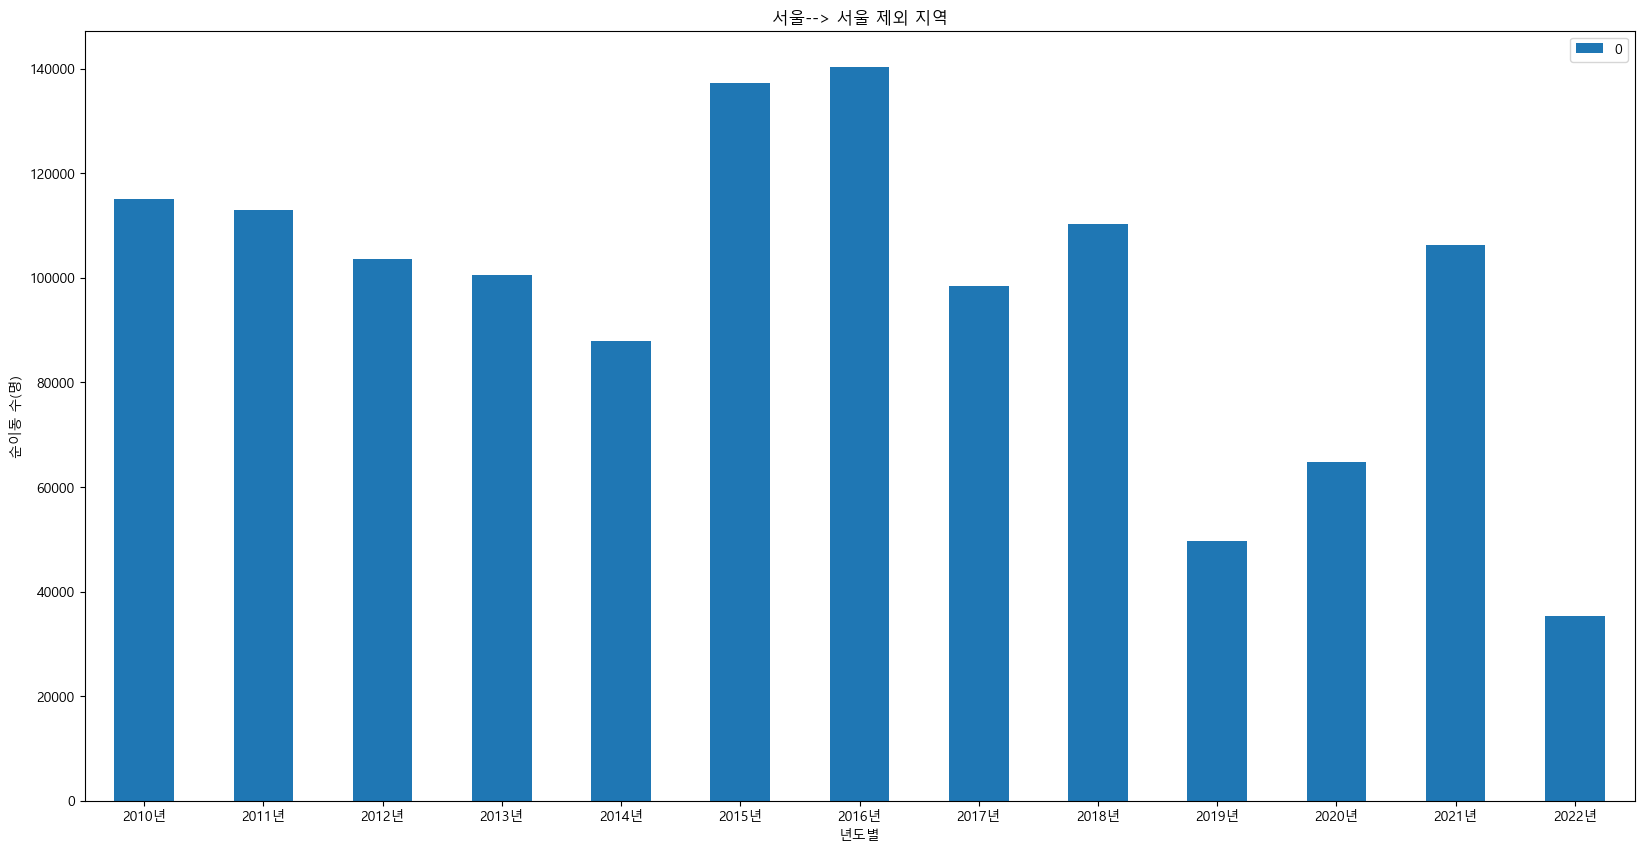

In [35]:
# 서울--> 전국 순이동 수(명) 그래프
df_kr1.plot.bar(figsize=(20,10), title = '서울--> 서울 제외 지역',
                       xlabel = '년도별', ylabel = '순이동 수(명)')
plt.xticks(rotation = 360)
plt.savefig('전출서울 전체 수.png')

#### 서울--> 전국 순이동 수(명) plot
* 서울에서 각 지역별로의 순이동 수를 확인
* 년도별 이동 수의 증감은 있지만 지속적으로 탈서울하는 것을 확인할 수 있음.
* 탈서울하여 수도권, 제주로의 이동을 확인할 수 있음.
* 전라권, 경상권에서는 오히려 서울로의 유입을 확인할 수 있음.

<AxesSubplot:title={'center':'서울--> 지역별'}, xlabel='년도별', ylabel='순이동 수(명)'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2010년'),
  Text(1, 0, '2011년'),
  Text(2, 0, '2012년'),
  Text(3, 0, '2013년'),
  Text(4, 0, '2014년'),
  Text(5, 0, '2015년'),
  Text(6, 0, '2016년'),
  Text(7, 0, '2017년'),
  Text(8, 0, '2018년'),
  Text(9, 0, '2019년'),
  Text(10, 0, '2020년'),
  Text(11, 0, '2021년'),
  Text(12, 0, '2022년')])

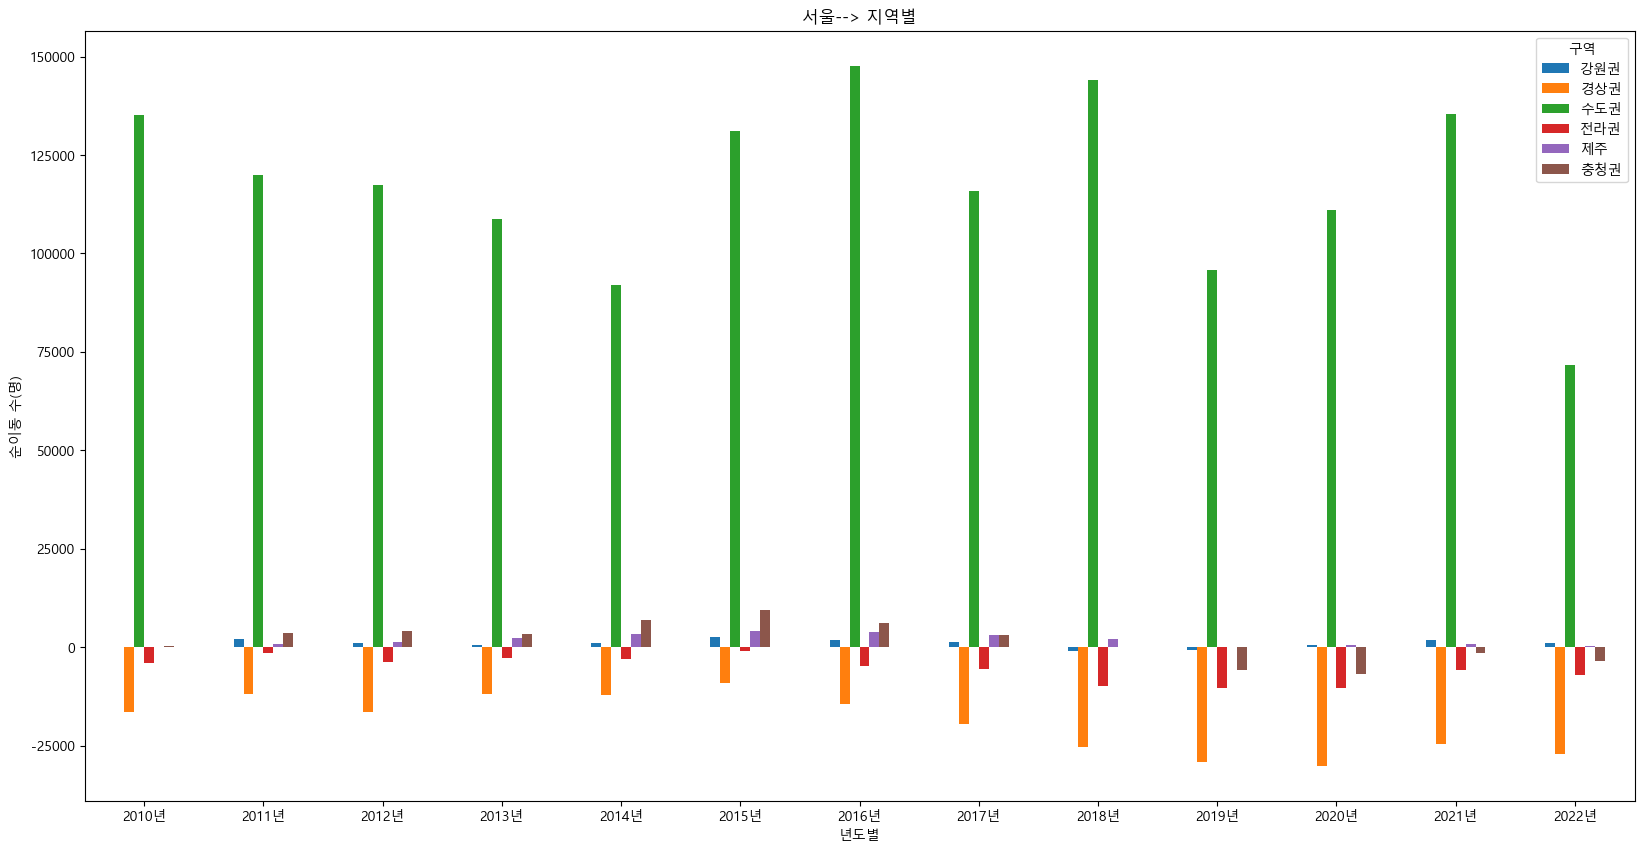

In [36]:
# 서울 --> 서울 제외 지역별 순이동수(명)
df_sum_area_no_kr = df_sum_area_no_kr.T
df_sum_area_no_kr.plot(kind='bar', figsize=(20,10), title = '서울--> 지역별',
                       xlabel = '년도별', ylabel = '순이동 수(명)')
plt.xticks(rotation = 360)
plt.savefig('전출서울 지역별 전입.png')

#### 다양한 시각화 시도

<AxesSubplot:title={'center':'서울--> 지역별'}, xlabel='년도별', ylabel='순이동 수(명)'>

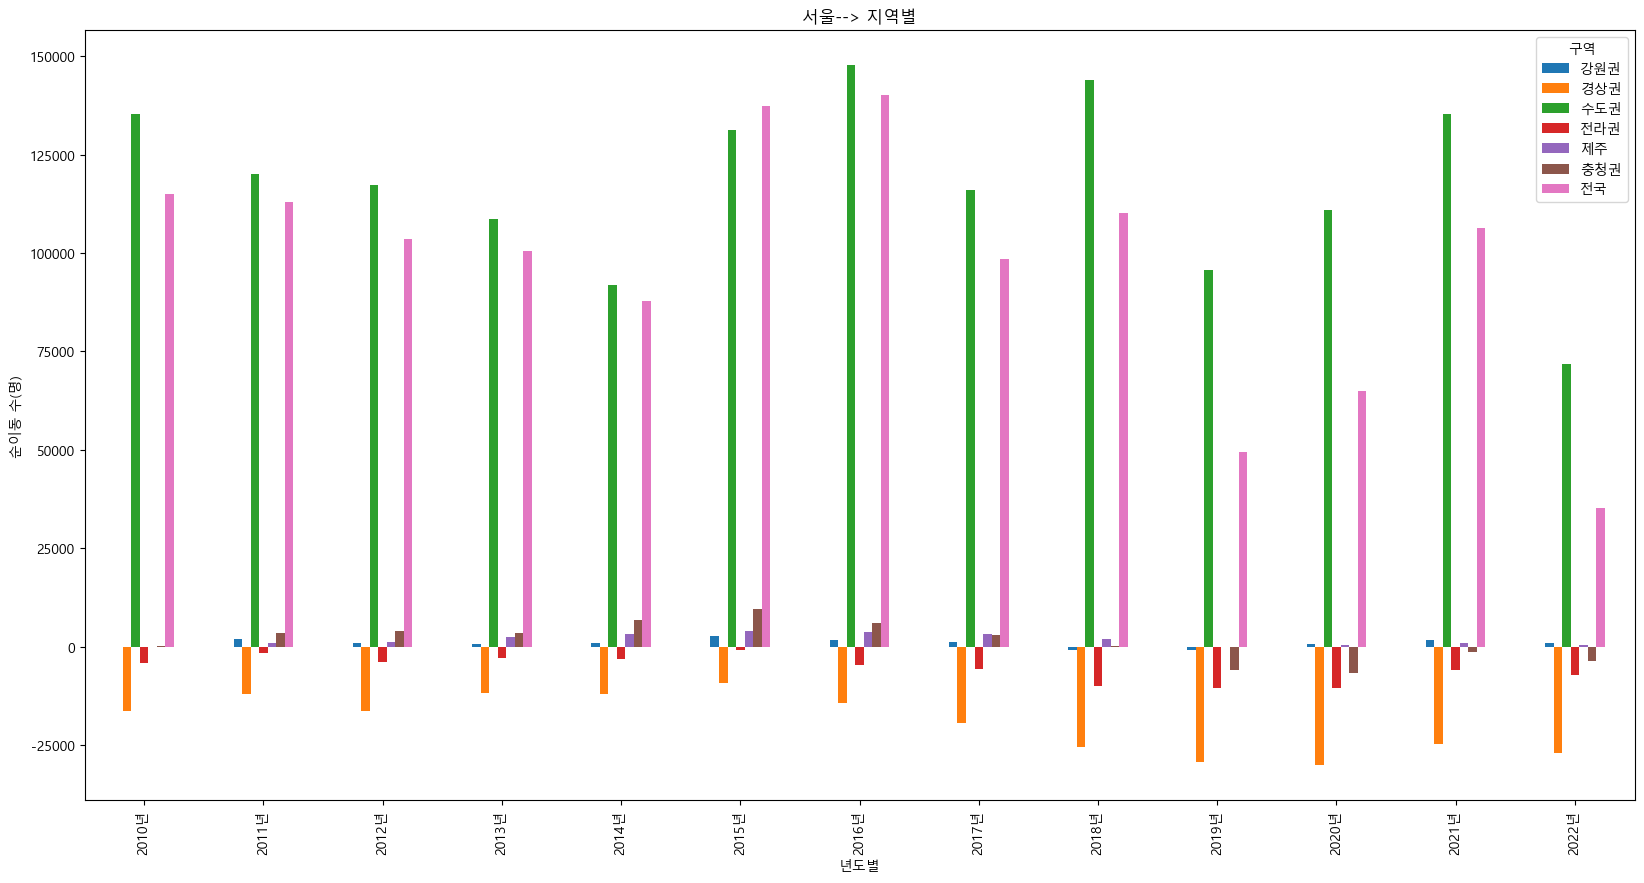

In [37]:
# 서울 --> 서울 제외 지역별 순이동수(명), 전국(total) 값 포함
df_sum_area_total1 = df_sum_area_total.T
df_sum_area_total1.plot(kind='bar', figsize=(20,10), title = '서울--> 지역별',
                       xlabel = '년도별', ylabel = '순이동 수(명)')

#### 수도권 중 인천광역시를 제외한 경기도로의 유입만 확인

In [38]:
# 서울 --> 수도권 : 경기도, 인천광역시  순이동 수(명)
g_df_soodo = df_soodo.T
g_df_soodo1 = g_df_soodo.drop(['합계'], axis=1)
g_df_soodo1.rename(columns={3:'인천광역시',8:'경기도'}, inplace=True)
g_df_soodo1 = g_df_soodo1.drop(['구역','전입지별'])
g_df_soodo1

,인천광역시,경기도
2010년,10412.0,124772.0
2011년,18633.0,101364.0
2012년,17424.0,99960.0
2013년,14407.0,94337.0
2014년,8832.0,83084.0
2015년,11345.0,119780.0
2016년,11259.0,136403.0
2017년,7957.0,107985.0
2018년,8818.0,135216.0
2019년,3811.0,91954.0


#### 수도권으로의 유입 추이 plot
* 인천광역시보다 경기도로의 유입이 압도적으로 큼.

<AxesSubplot:title={'center':'서울 --> 경기도, 인천광역시'}, xlabel='년도별', ylabel='순이동 수(명)'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2010년'),
  Text(1, 0, '2011년'),
  Text(2, 0, '2012년'),
  Text(3, 0, '2013년'),
  Text(4, 0, '2014년'),
  Text(5, 0, '2015년'),
  Text(6, 0, '2016년'),
  Text(7, 0, '2017년'),
  Text(8, 0, '2018년'),
  Text(9, 0, '2019년'),
  Text(10, 0, '2020년'),
  Text(11, 0, '2021년'),
  Text(12, 0, '2022년')])

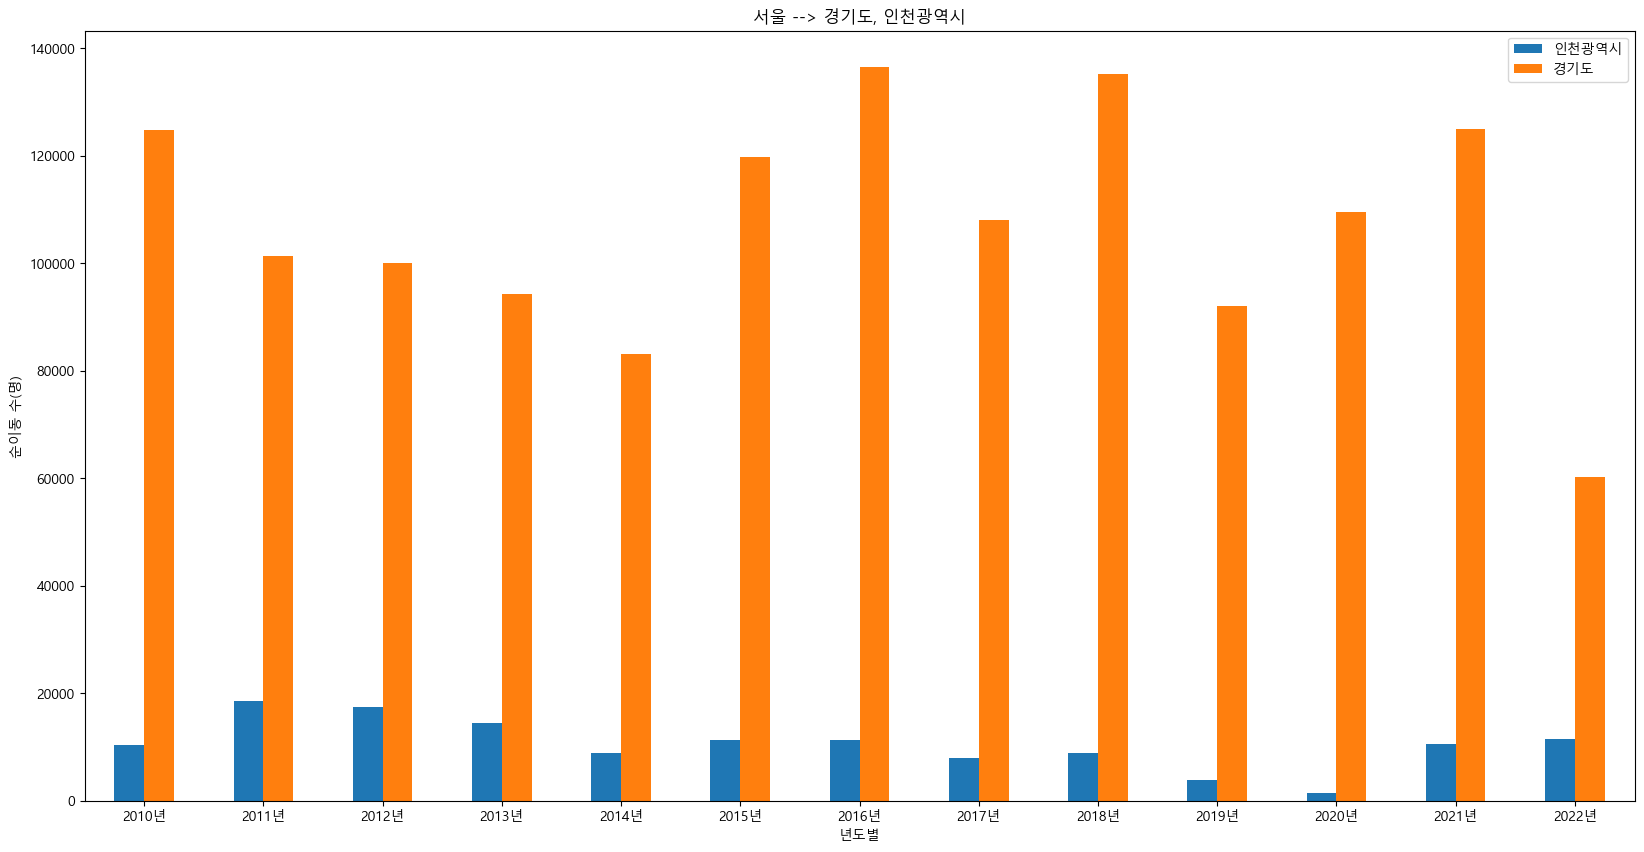

In [39]:
# 서울 --> 수도권 : 경기도, 인천광역시  순이동 수(명)
g_df_soodo1.plot.bar(figsize=(20,10), title = '서울 --> 경기도, 인천광역시',
                       xlabel = '년도별', ylabel = '순이동 수(명)')
plt.xticks(rotation = 360)
plt.savefig('전출서울 수도권전입.png')

In [40]:
#서울 --> 경기도 순이동 수(명)
g_df_soodo1_gyeonggig = g_df_soodo1.drop(columns =['인천광역시'])
g_df_soodo1_gyeonggig

,경기도
2010년,124772.0
2011년,101364.0
2012년,99960.0
2013년,94337.0
2014년,83084.0
2015년,119780.0
2016년,136403.0
2017년,107985.0
2018년,135216.0
2019년,91954.0


#### 서울에서 경기도로의 유입 추이 plot

<AxesSubplot:title={'center':'서울 --> 경기도'}>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2010년'),
  Text(1, 0, '2011년'),
  Text(2, 0, '2012년'),
  Text(3, 0, '2013년'),
  Text(4, 0, '2014년'),
  Text(5, 0, '2015년'),
  Text(6, 0, '2016년'),
  Text(7, 0, '2017년'),
  Text(8, 0, '2018년'),
  Text(9, 0, '2019년'),
  Text(10, 0, '2020년'),
  Text(11, 0, '2021년'),
  Text(12, 0, '2022년')])

Text(0.5, 0, '기간')

Text(0, 0.5, '순이동 수(명)')

Text(0.5, 1.0, '서울 -> 경기도 순이동 수(명) 추이')

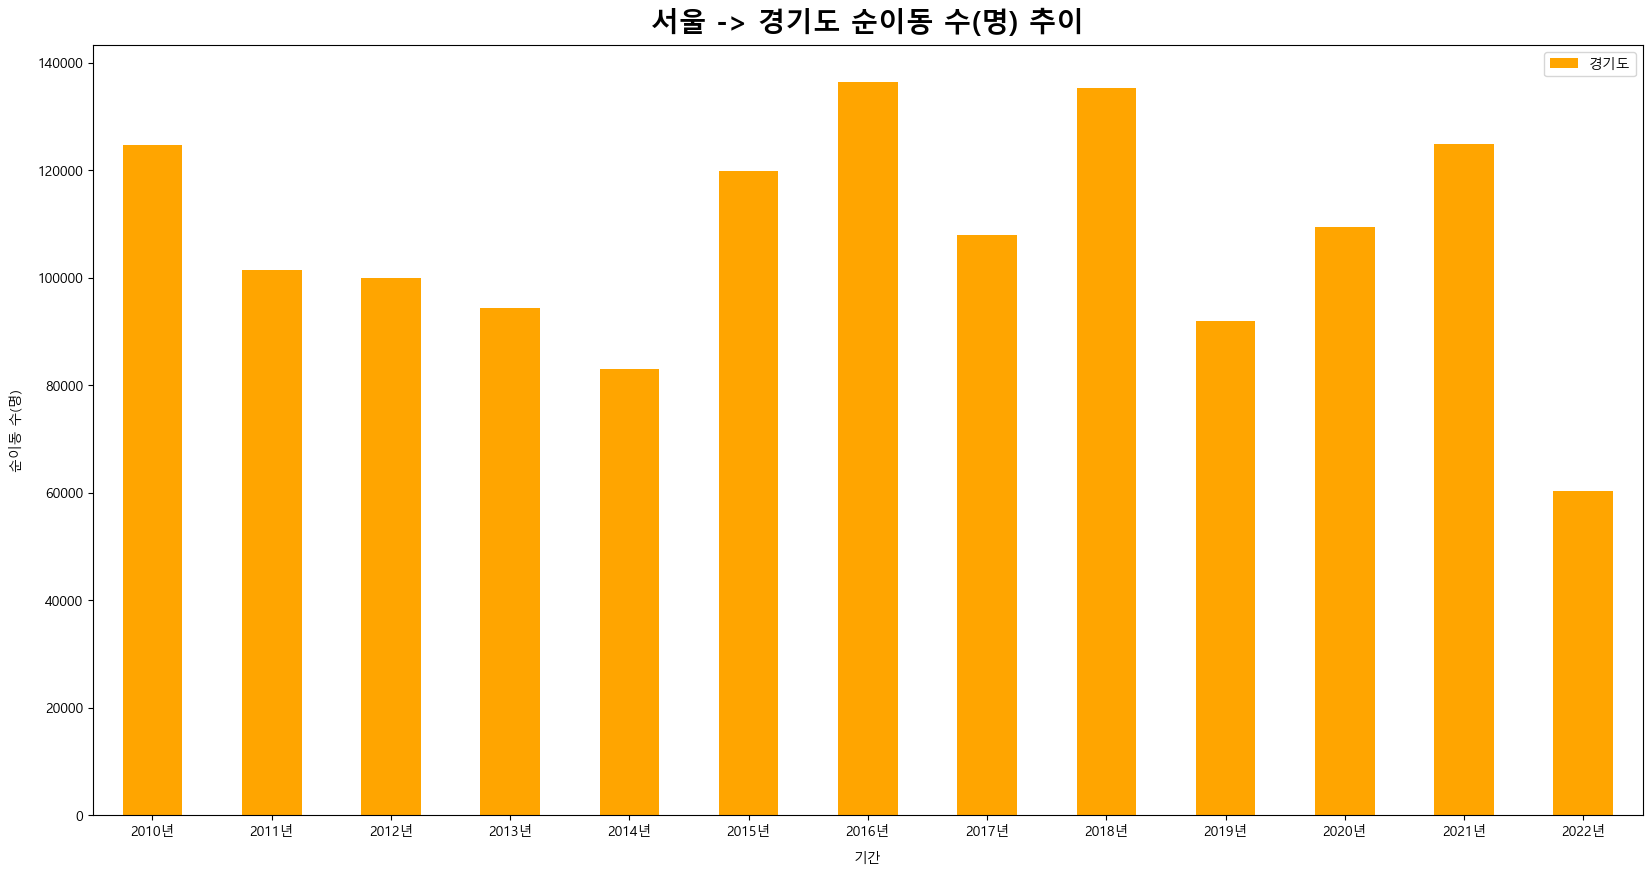

In [41]:
#시각화 : 서울 --> 경기도 순이동 수(명) 그래프
g_df_soodo1_gyeonggig.plot(kind = 'bar',figsize=(20,10), title = '서울 --> 경기도',
                       color = 'orange')
plt.xticks(rotation = 360)
plt.xlabel('기간', labelpad = 10)
plt.ylabel('순이동 수(명)', labelpad = 10)
plt.title('서울 -> 경기도 순이동 수(명) 추이', pad = 10, fontweight = 'bold', fontsize = 20)
plt.savefig('전출서울 전입경기 .png')

### 결론
2010년부터 2022년까지 지속적인 탈서울 움직임을 볼 수 있으며, 특히 경기도로의 유입이 압도적인 비율을 차지함을 알 수 있음.